In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from seaborn import countplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit or not (variable y).


In [2]:
Bank = pd.read_csv('C:/Penn State/Projects/bank/bank_full.csv', sep=';')

In [3]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Input variables:<br>
## bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
## related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
## other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

## Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
print("Number of rows :{}, Number of columns:{}".format(Bank.shape[0], Bank.shape[1]))

Number of rows :45211, Number of columns:17


In [5]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
Bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

# Visualise poutcome column
This column shows records of previous campaign information.

Text(0.5,1,'Number of respondents by the outcome of the previous campaign')

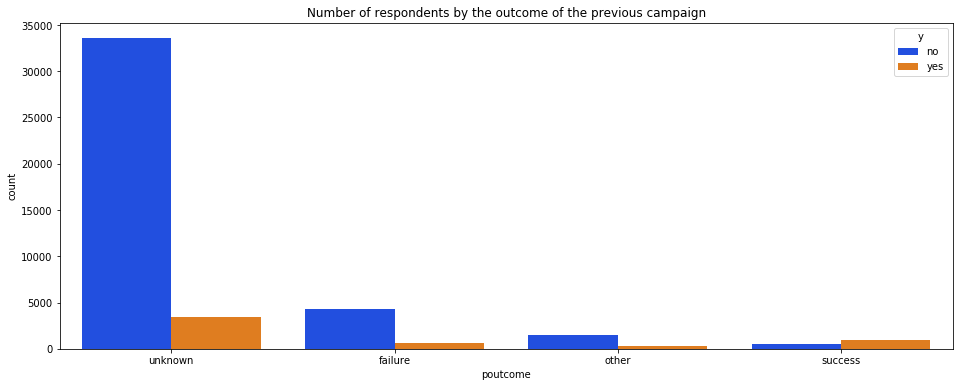

In [8]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.countplot('poutcome', data=Bank, hue = 'y',order=Bank['poutcome'].value_counts().index, palette = "bright")
plt.title("Number of respondents by the outcome of the previous campaign")

## Checking Unknown values in poutcome column
check unique values

In [9]:
Bank.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [10]:
Bank.loc[Bank['poutcome'] == 'unknown'].shape[0]

36959

80 % entries has poutcome  = 'Unknown'

In [11]:
print('Previous year failure and current success entries:', Bank.loc[(Bank['poutcome'] == 'failure') & (Bank['y'] == 'yes')]
      .shape[0])
print('Previous year success and current success entries:', Bank.loc[(Bank['poutcome'] == 'success') & (Bank['y'] == 'yes')]
      .shape[0])

Previous year failure and current success entries: 618
Previous year success and current success entries: 978


These entries only constitute 2% of total entries. <br>
We can drop this column

In [12]:
Bank = Bank.drop(columns = ['poutcome'])

In [13]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no


# Checking Unknown values in contact column

In [14]:
Bank.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [15]:
print('Unknowns in contact column:', Bank.loc[Bank['contact'] == 'unknown'].shape[0])

Unknowns in contact column: 13020


In [16]:
print('Duration greater than 60 and contact equal to cellular entries:', 
Bank.loc[(Bank['duration']>= 60) &  (Bank['contact'] == 'cellular')].shape[0])

Duration greater than 60 and contact equal to cellular entries: 26774


In [17]:
print('Campaign lesser than 20 and contact equal to cellular entries:', 
Bank.loc[(Bank['campaign']< 20) &  (Bank['contact'] == 'cellular')].shape[0])

Campaign lesser than 20 and contact equal to cellular entries: 29127


Here we can assume that if duration >= 60 sec and campaign < 20, then contact is 'cellular' else 'telephone' 

In [18]:
Bank.loc[(Bank['duration']>= 60) &  (Bank['campaign']< 20) & (Bank['contact'] == 'unknown'), ['contact']] = 'cellular'

In [19]:
Bank.loc[(Bank['contact'] == 'unknown'), ['contact']] = 'telephone'

In [20]:
print('Unknowns in contact column:',
Bank.loc[Bank['contact'] == 'unknown'].shape[0])

Unknowns in contact column: 0


# Check unique values in other object columns

In [21]:
Bank.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [22]:
Bank.default.unique()

array(['no', 'yes'], dtype=object)

In [23]:
Bank.housing.unique()

array(['yes', 'no'], dtype=object)

In [24]:
Bank.loan.unique()

array(['no', 'yes'], dtype=object)

In [25]:
Bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

# Unknowns in education and job

In [26]:
Bank.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [27]:
print('Unknowns in job column:', Bank.loc[Bank['job'] == 'unknown'].shape[0])

Unknowns in job column: 288


In [28]:
Bank.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [29]:
print('Unknowns in education column:', Bank.loc[Bank['education'] == 'unknown'].shape[0])

Unknowns in education column: 1857


In [30]:
Bank.loc[(Bank['job'] == 'unknown') & (Bank['education'] == 'unknown')].shape[0]

127

In [31]:
Bank.groupby(['job', 'education'])['education'].count()

job            education
admin.         primary       209
               secondary    4219
               tertiary      572
               unknown       171
blue-collar    primary      3758
               secondary    5371
               tertiary      149
               unknown       454
entrepreneur   primary       183
               secondary     542
               tertiary      686
               unknown        76
housemaid      primary       627
               secondary     395
               tertiary      173
               unknown        45
management     primary       294
               secondary    1121
               tertiary     7801
               unknown       242
retired        primary       795
               secondary     984
               tertiary      366
               unknown       119
self-employed  primary       130
               secondary     577
               tertiary      833
               unknown        39
services       primary       345
               sec

These unknow values in both columns are not more than 4% of total data, we can drop them.
# Convert unknown values to NaN and then drop

In [32]:
Bank = Bank.replace({'unknown': np.nan})

In [33]:
Bank.isna().any()

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
y            False
dtype: bool

In [34]:
Bank = Bank.dropna()

In [35]:
Bank.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
y            False
dtype: bool

In [36]:
Bank.shape

(43193, 16)

In [37]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,cellular,5,may,217,1,-1,0,no


# Pday and Balance Colums
## Pday
pdays: number of days that passed by after the client was last contacted from a previous campaign<br>
numeric; -1 means client was not previously contacted so we will convert -1 to 0<br>

## Balance
No information has been given about balance. Some of balance value is zero. It is safe to drop this column.

In [38]:
Bank[Bank['pdays']==-1].shape[0]

35281

In [39]:
Bank['pdays'][Bank['pdays']==-1] = 1
Bank['balance'][Bank['balance'] < 0] = 0

# Statistics

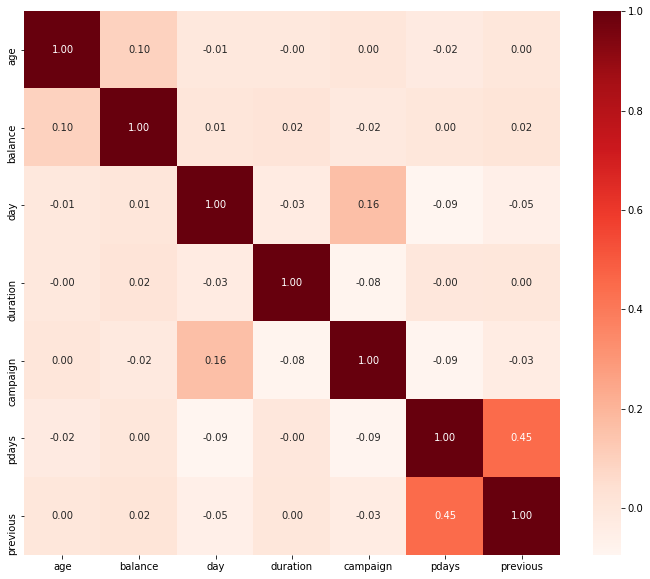

In [41]:
numeric_columns = [col for col in Bank.columns if Bank[col].dtype!= 'object']
Bank_numeric = Bank[numeric_columns]

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(Bank_numeric.corr(), cmap="Reds", annot=True, fmt=".2f")

In [42]:
Bank_numeric.isna().any()

age         False
balance     False
day         False
duration    False
campaign    False
pdays       False
previous    False
dtype: bool

# String to Categorical Variables
columns in string format: job,	marital,	education,	default,	housing,	loan,	contact, month, y<br>
We need to convert them to numeric values to dal with parametric models<br>
We will apply this just before model pipeline

In [43]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,1,0,no
6,28,management,single,tertiary,no,447,yes,yes,cellular,5,may,217,1,1,0,no


# Apply Label encoder

In [46]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,1,0,no
6,28,management,single,tertiary,no,447,yes,yes,cellular,5,may,217,1,1,0,no


In [47]:
le = LabelEncoder()

categorical_mask = (Bank.dtypes == object)
categorical_columns = Bank.columns[categorical_mask].tolist()# + ['age', 'day']

Bank[categorical_columns] = Bank[categorical_columns].apply(lambda x: le.fit_transform(x))

In [48]:
Bank.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,1,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,1,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,1,0,0
5,35,4,1,2,0,231,1,0,0,5,8,139,1,1,0,0
6,28,4,2,2,0,447,1,1,0,5,8,217,1,1,0,0
7,42,2,0,2,1,2,1,0,0,5,8,380,1,1,0,0
8,58,5,1,0,0,121,1,0,1,5,8,50,1,1,0,0
9,43,9,2,1,0,593,1,0,1,5,8,55,1,1,0,0
10,41,0,0,1,0,270,1,0,0,5,8,222,1,1,0,0
11,29,0,2,1,0,390,1,0,0,5,8,137,1,1,0,0


In [49]:
Bank.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
y            False
dtype: bool

# Target Analysis

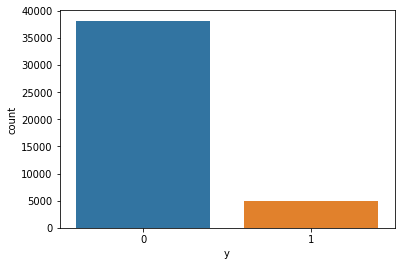

In [50]:
plt.figure()
countplot(data=Bank,x='y')
plt.show()


Our class distribution is highly unbalance. We have to select metric carefully. <br>
<b>Metric</b>: F2<br>
Reason: We are focusng on out of successful calls, how many of them are actually predicted correct. Here we are close to 'Recall' but also want some precision in our metric. Hence F2 is beneficial.


In [51]:
Bank.to_csv("C:/Penn State/Projects/bank/Bank_preprocessed_3.csv")